<a href="https://colab.research.google.com/github/slagana8/food_sales_predicitions-/blob/main/Project_1_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1: Sales Predictions
Sam Lagana

In [1]:
import pandas as pd
import numpy as np


In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Downloading sales_predictions data
filename = "/content/drive/MyDrive/Data/sales_predictions.csv"
df_sp = pd.read_csv("/content/drive/MyDrive/Data/sales_predictions.csv")
df_sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# 1) How many rows and columns?
df_sp.shape

(8523, 12)

In [5]:
# 2) What are the datatypes of each variable?
df_sp.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
# 3) Are there duplicates? If so, drop any duplicates.
df_sp.duplicated().any()

False

In [7]:
# Another way to check 
df_sp[df_sp.duplicated(keep = False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [8]:
# 4)Identify missing values.
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# Option 2
df_sp.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Option 3 to display all rows with missing data
df_sp[df_sp.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [11]:
# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
df_sp["Outlet_Size"]=df_sp.loc[:, "Outlet_Size"].fillna("Unknown")

# Filled all missing data with "Unknown" since it would be innacurate to fill with simply "Low, Medium, or High" using interpolation
# given the vareity of each data point 



In [12]:
df_sp["Item_Weight"]=df_sp.loc[:,"Item_Weight"].fillna(df_sp["Item_Weight"].mean())
# Since value is a float I found it to be most accurate to replace missing values with the mean of "Item_Weight"

In [13]:
# 6) Confirm that there are no missing values after addressing them
df_sp.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

df_sp.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
# Starting with looking at columns that are objects
# "Item_Identifier"
df_sp["Item_Identifier"].unique()
# consistent

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [16]:
# "Item_Fat_Content"
df_sp["Item_Fat_Content"].unique()
# Not consistent 

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
# Fix "Item_Fat_Content" inconsistencies
df_sp.replace(["low fat","LF"],["Low Fat", "Low Fat"], inplace = True)
df_sp.replace(["reg"],["Regular"], inplace = True)
# Check if fixed
df_sp['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [18]:
# "Item_Type"
df_sp["Item_Type"].unique()
# Consistent

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [19]:
# "Outlet_Identifier"
df_sp["Outlet_Identifier"].unique()
# Consistent

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [20]:
# "Outlet_Size"
df_sp["Outlet_Size"].unique()
# Inconsistent "High" doesn't go along with "Small" and "Medium"

array(['Medium', 'Unknown', 'High', 'Small'], dtype=object)

In [21]:
# Fix Inconsistencies
df_sp.replace(["High"],["Large"], inplace = True)
# Confirm fixed
df_sp["Outlet_Size"].unique()

array(['Medium', 'Unknown', 'Large', 'Small'], dtype=object)

In [22]:
# "Outlet_Location_Type"
df_sp["Outlet_Location_Type"].unique()
# Consistent

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [23]:
# "Outlet_Type"
df_sp["Outlet_Type"].unique()
# Inconsistent "Grocery Store" doesn't go along with "Supermarket Type 1, 2, 3"

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [24]:
# Fix inconsistency 
df_sp.replace(["Grocery Store"],["Supermarket Type4"], inplace = True)
# Confirm fixed
df_sp["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type4',
       'Supermarket Type3'], dtype=object)

In [25]:
# Checking float and interger columns for inconsistencies
df_sp.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
# Only inconsistency I see here is "Item_Outlet_Sales" should be rounded to two decimal places since the value is a price
df_sp["Item_Outlet_Sales"]=df_sp["Item_Outlet_Sales"].round(decimals = 2)

In [27]:
# Confirm it worked
df_sp

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Supermarket Type4,732.38
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.71
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Large,Tier 3,Supermarket Type1,2778.38
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.28
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.11
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.60


In [28]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
iw_min = df_sp["Item_Weight"].min()
iw_max = df_sp["Item_Weight"].max()
iw_mean = df_sp["Item_Weight"].mean()
print("Item_Weight min is:",iw_min,"max is:",iw_max, "and mean is:", iw_mean)


Item_Weight min is: 4.555 max is: 21.35 and mean is: 12.857645184136409


In [29]:
iv_min = df_sp["Item_Visibility"].min()
iv_max = df_sp["Item_Visibility"].max()
iv_mean = df_sp["Item_Visibility"].mean()
print("Item_Visibility min is:",iv_min,"max is:",iv_max,"and mean is:",iv_mean)

Item_Visibility min is: 0.0 max is: 0.328390948 and mean is: 0.06613202877895127


In [30]:
mrp_min = df_sp["Item_MRP"].min()
mrp_max = df_sp["Item_MRP"].max()
mrp_mean = df_sp["Item_MRP"].mean()
print("Item_MRP min is:", mrp_min, "max is:", mrp_max, "and mean is:", mrp_mean)

Item_MRP min is: 31.29 max is: 266.8884 and mean is: 140.9927819781768


In [31]:
year_min = df_sp["Outlet_Establishment_Year"].min()
year_max = df_sp["Outlet_Establishment_Year"].max()
year_mean = df_sp["Outlet_Establishment_Year"].mean()
print("Outlet_Establishment min is:", year_min, "max is:", year_max, "and mean is:", year_mean)

Outlet_Establishment min is: 1985 max is: 2009 and mean is: 1997.8318667135984


In [32]:
sales_min = df_sp["Item_Outlet_Sales"].min()
sales_max = df_sp["Item_Outlet_Sales"].max()
sales_mean = df_sp["Item_Outlet_Sales"].mean()
print("Item_Outlet_Sales min is:", sales_min,"max is:", sales_max,"and mean is:", sales_mean)

Item_Outlet_Sales min is: 33.29 max is: 13086.96 and mean is: 2181.288926434349


In [33]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Create a boxplot to view the distributions of varios feature in your data set
df_sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Supermarket Type4,732.38
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.71


In [35]:
# Create boxplot comparing "Item_Outlet_Sales" in each Tier
#Creating filters
tier_1 = df_sp["Outlet_Location_Type"] == "Tier 1"
tier_2 = df_sp["Outlet_Location_Type"] == "Tier 2"
tier_3 = df_sp["Outlet_Location_Type"] == "Tier 3"

In [36]:
# Continue creating filters
tier_one = df_sp.loc[tier_1, "Item_Outlet_Sales"]
tier_two = df_sp.loc[tier_2, "Item_Outlet_Sales"]
tier_three = df_sp.loc[tier_3, "Item_Outlet_Sales"]

## How do the three Tiers relate to each other?

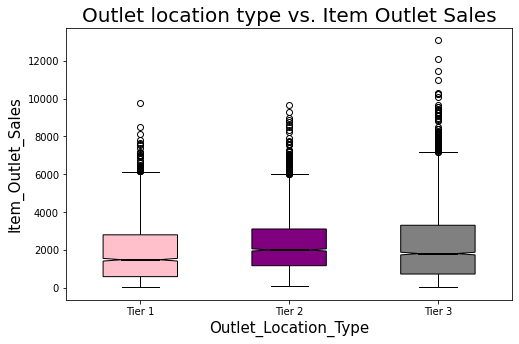

In [43]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([tier_one,tier_two,tier_three],
                        notch = True,
                        labels = ["Tier 1","Tier 2", "Tier 3"],
                        widths = .5,
                        patch_artist = True,
                        medianprops = dict(linestyle= "-", linewidth = 2, color = "k")
                        );
boxplot1 = boxplots["boxes"][0];
boxplot2 = boxplots["boxes"][1];
boxplot3 = boxplots["boxes"][2];
boxplot1.set_facecolor("pink")
boxplot2.set_facecolor("purple")
boxplot3.set_facecolor("grey")
plt.xlabel("Outlet_Location_Type", fontsize = 15);
plt.ylabel("Item_Outlet_Sales", fontsize = 15);
plt.title("Outlet location type vs. Item Outlet Sales", fontsize = 20)
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

By looking at the boxplot you can see thay their min , meadian, and majority of their sales are very similar. The only major difference you can see is "Tier_3" has outliers that range to much higher sales. 

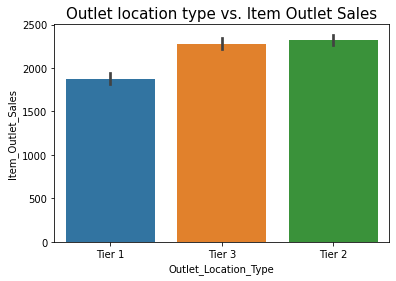

In [44]:
x = sns.barplot(data = df_sp, x = "Outlet_Location_Type", y = "Item_Outlet_Sales")
x.set_title("Outlet location type vs. Item Outlet Sales", fontsize = 15);

By looking at this you can see that the Tier_2 produces slightly higher sales then Tier_3 and Tier_2 and Tier_3 have higher sales then Tier_1.

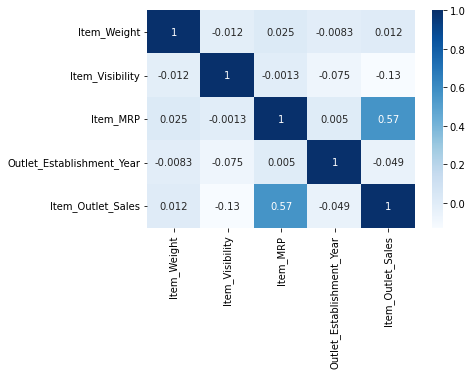

In [38]:
# Create a Heatmap
corr = df_sp.corr()
sns.heatmap(corr, cmap = "Blues", annot = True);

This heatmap shows most of these categories don't have a high correlation. "Item_MRP" and "Item_Outlet_Sales" have a moderate correlation so if I would chose to investegate these further. 

## How does Item MRP affect Item Outlet Sales?

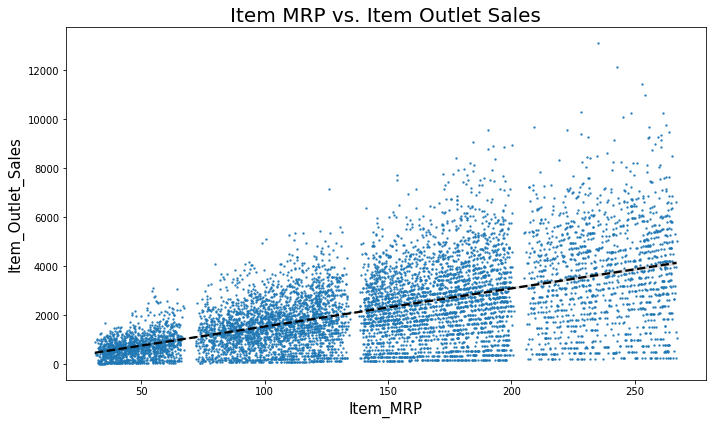

In [81]:
fig = plt.figure(figsize = (10,6))
x = sns.regplot(data = df_sp, x = "Item_MRP", y = "Item_Outlet_Sales", line_kws = {"color":"k", "ls":"--"}, scatter_kws = {"s":2})
x.set_title("Item MRP vs. Item Outlet Sales", fontsize = 20)
x.set_xlabel("Item_MRP",fontsize = 15)
x.set_ylabel("Item_Outlet_Sales", fontsize = 15);
fig.tight_layout()
fig.savefig("outlet_sales.jpg")

## Does Outlet Size relate to higher Item MRP and Item Outlet Sales?

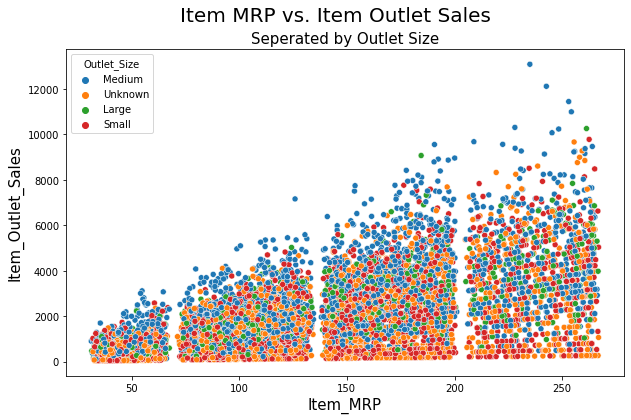

In [80]:
fig = plt.figure(figsize = (10,6))
x = sns.scatterplot(data = df_sp, x = "Item_MRP", y = "Item_Outlet_Sales", hue = "Outlet_Size")
x.set_title("Seperated by Outlet Size", fontsize = 15)
fig.suptitle("Item MRP vs. Item Outlet Sales", fontsize = 20)
x.set_xlabel("Item_MRP",fontsize = 15)
x.set_ylabel("Item_Outlet_Sales", fontsize = 15);

Outlet size doesn't seem to have a strong effect on Item MRP or Item Outlet Sales but Medium Outlet Size's seem to be the ones with the highest Item Outlet Sales.